In [2]:
# 라이브러리 호출
from google.colab import drive
drive.mount('/content/drive') 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import pandas as pd
import os
from PIL import Image

#시각화 처리
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 이미지 재정의
targerdir ='/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet'  #폴더 설정
files = os.listdir(targerdir)
print(files)
print(len(files))
for i in range(len(files)):
  tmpdatadir = targerdir + '/' + files[i] # 각 폴더 경로 저장
  print(len(os.listdir(tmpdatadir)))
  print(len(os.listdir(tmpdatadir))//30)
  print("\n")  
  print(tmpdatadir)






['L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']
20
1893
63


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10
518
17


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_12
1509
50


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_15
410
13


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_20
410
13


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_21
782
26


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_24
6189
206


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_25
426
14


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_27
595
19


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_3
364
12


/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_30
6206
206


/content/drive/MyDrive/

In [5]:
for i in range(len(files)) :
  targerdir = targerdir + '/' + files[i]
  format = [".jpg", ".png", ".jpeg", "bmp", ".JPG", ".PNG", "JPEG", "BMP"]  # 지원하는 파일 형태의 확장자들
  for (root, dirs, files) in os.walk(targerdir): #os.walk를 통해 하위 디렉토리 탐색
      flen = len(os.listdir(targerdir))
      for file in range(flen):
          if file.endswith(tuple(format)): #특정 확장자 파일 찾기
              image = Image.open(root+file)
              print(image.filename)
              print(image.size)

              if image.mode != 'RGB': 
                  image = image.convert('RGB') #RGB 모드가 아닌 이미지를 rgb로 변환

              image = image.resize((100,100)) #이미지 사이즈 설정
              image.save('/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/TestData' + file) #이미지 저장

              print(image.size)

          else:
              print(root)
              print("InValid", file)


In [7]:
# 변환할 이미지 목록 불러오기
for j in range(len(files)) : 
  t = files[j]
  image_path = targerdir + '/' + t + '/'
  fileleng = (len(os.listdir(tmpdatadir))//30)+1
  for k in range(fileleng):
    img_list = os.listdir(image_path)  # 디렉토리 내 모든 파일 불러오기
    if (len(img_list)>30) :
      globals()["tmpimg_list{}".format(k)] = [os.listdir(image_path)]
    img_list_jpg = [img for img in img_list if img.endswith(".jpg")]  # 지정된 확장자만 필터링

    print("img_list_jpg: {}".format(img_list_jpg)) #파일 포멧 출력

    img_list_np = [] #넘파이 저장할 배열

    for i in img_list_jpg: #이미지 넘파일로 변환 후 배열 추가
        img = Image.open(image_path + i)
        img_array = np.array(img)
        img_list_np.append(img_array)
        print(i, " 이미지 차원:", img_array.shape)  # 불러온 이미지의 차원 확인 (세로X가로X색)
        print(img_array.T.shape) #축변경 (색X가로X세로)

    img_np = np.array(img_list_np)  # 리스트를 numpy로 변환
    np.save('./sample_data', img_np)  # x_save.npy
    print(img_np.shape)
    print("저장 완료")

OSError: ignored

In [ ]:
sample_data = np.load('sample_data.npy')
sample_data_2d = sample_data.reshape(-1, 100 * 100 * 3)

print("sample_data의 shape 맞추기:", sample_data)
print("sample_data_2d의 shape 맞추기:", sample_data_2d)
# 여기에서 출력되는 차원의 숫자가 같아야 한다.
print("sample_data.shape:", sample_data.shape)
print("sample_data_2d.shape:", sample_data_2d.shape)

In [ ]:
from sklearn.cluster import KMeans

# K값을 지정해 준다.random_state=항상 값은값이 랜덤하게 나온다.
km = KMeans(n_clusters=5)  # random_state=42 -> 항상 랜덤값이 같게 하기위해 쓴다.
# 사이킷 런의 철학은 nxd, 갯수x차원
km.fit(sample_data_2d)
# 할당된 레이블의 결과를 볼 수 있다.
print("km.labels_", km.labels_)
print("km.labels_.shape", km.labels_.shape)
print("첫번째:", km.labels_[0:])

print(np.unique(km.labels_, return_counts=True)) #배열 값 중 중복 제거 후 반환
print(km.labels_)


km.labels_ [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 4 3 0 3 2 3 2 3 0 0 3 4 3 4 4 0 0 2 4 3 4 3 2 3 2 3 4 3 0 2 2 3 4 2 0 4
 4 0 0 2 4 4 0 0 0 4 4 3 3 3 3 0 3 4 3 3 3 4 4 4 0 3 3 0 3 3 2 4 0 0 4 0 3
 3 2 4 3 3 3 3 3 2 3 0 3 0 4 3 2 3 3 2 0 3 3 2 3 4 4 4 4 3 4 3 4 3 4 0 2 3
 0 4 3 3 4 4 0 2 2 3 3 4 0 0 3 3 0 4 3 2 3 2 3 0 3 4 3 0 0 2 4 2 3 3 4 0 0
 2 3 3 4 3 4 2 0 3 2 3 0 4 3 0 3 4 3 4 4 4 2 2 1 2 4 3 2 4 2 4 3 4 0 2 3 3
 3 4 2 3 4 3 0 4 0 4 3 2 4 2 2 3 3 2 3 3 0 2 3 4 0 4 2 0 0 0 4 2 0 4 3 4 3
 2 0 2 2 2 4 2 3 2 3 0 0 2 3 4 0 3 2 4 0 3 4 4 3 4 0 4 4 0 3 4 0 3 3 2 0 4
 4 4 3 2 0 3 3 0 4 0 3 3 3 2 1 4 3 4 3 3 3 2 3 0 3 4 4 0 2 2 2 0 3 4 0 3 2
 4 3 2 4 0 4 3 0 0 4 3 3 3 2 2 3 2 3 2 4 2 0 0 0 2 4 0 2 0 2 4 3 0 4 4 3 2
 4 4 0 3 0 4 4

In [ ]:
import matplotlib.pyplot as plt


def draw_sample_data(arr, ratio=1):
    n = len(arr)  #샘플 개수
    # 한 줄에 10개씩 이미지 그리기. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    print(n)
    rows = int(np.ceil(n / 10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        print(i)
        for j in range(cols):
            if i * 10 + j < n:  # n 개까지만 그립니다.
                #print(i)
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r') #회색 이미지 출력
            axs[i, j].axis('off') #axis 제거
    plt.show()

labels 0
150
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


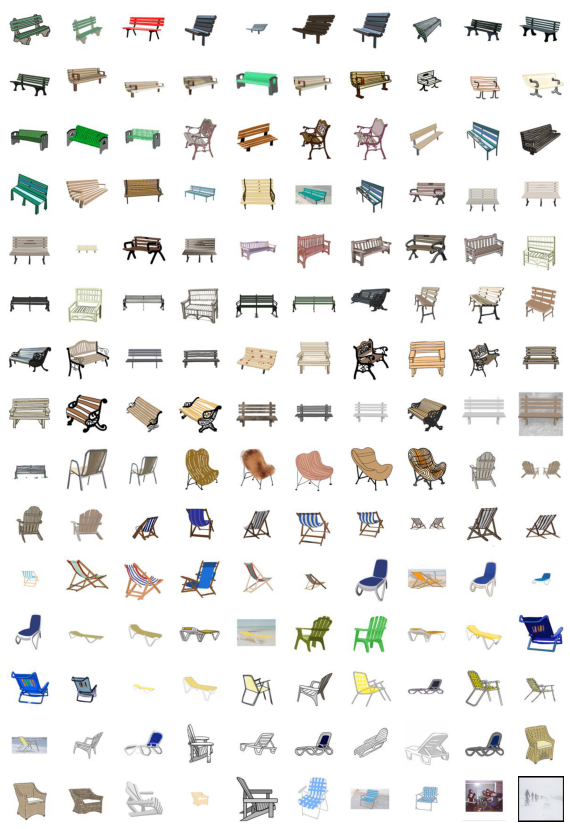

labels 1
398
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


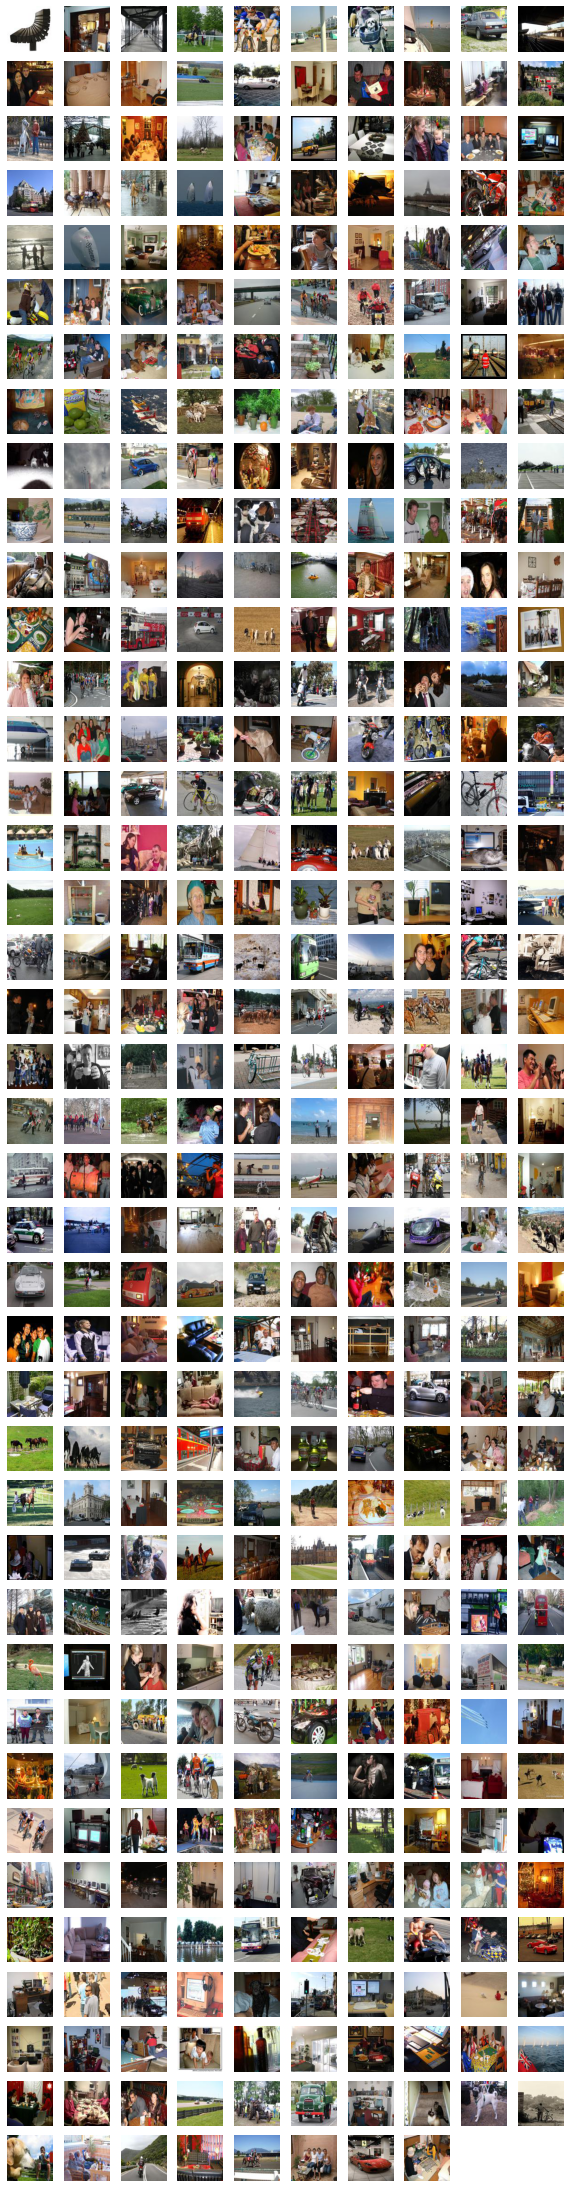

In [ ]:
print("labels 0")
draw_sample_data(sample_data[km.labels_ == 1])
print("labels 1")
draw_sample_data(sample_data[km.labels_ != 1])
# print("labels 2")
# draw_sample_data(sample_data[km.labels_ == 2])
# print("labels 3")
# draw_sample_data(sample_data[km.labels_ == 3])
# print("labels 4")
# draw_sample_data(sample_data[km.labels_ == 4])